# I. Classification

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits datasets: digits
digits = datasets.load_digits()

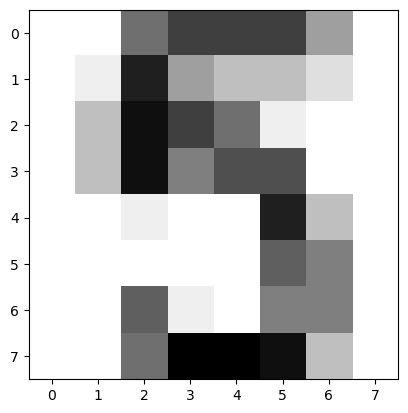

In [2]:
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
Y =  digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

print("Accuracy: {0}".format(knn.score(X_test, Y_test)))

Accuracy: 0.9861111111111112


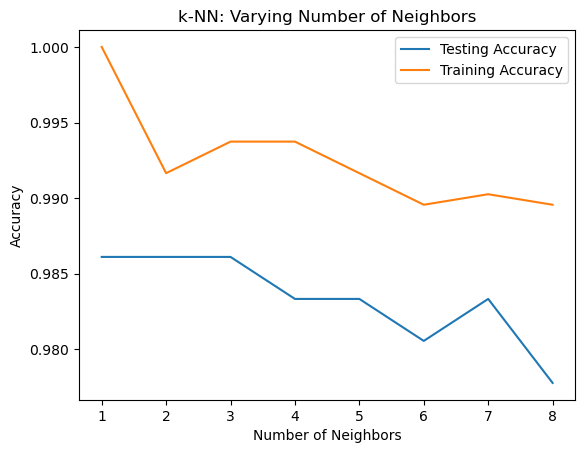

In [5]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, Y_train)
    
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    test_accuracy[i] = knn.score(X_test, Y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()   
    

In [6]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [8]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [10]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x10D4B81E050>, 5)


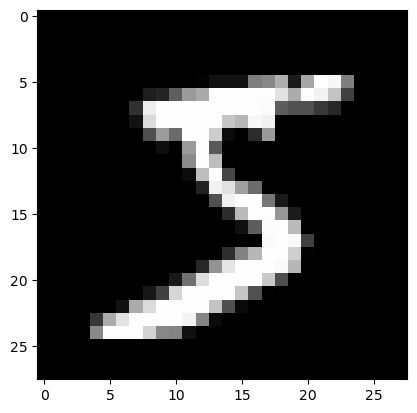

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0], cmap = 'gray')

In [12]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self) .__init__()
        
        self.fully = nn.Sequential(
        nn.Linear(28*28, 10))
        
    def forward(self, x):
        x = x.view([-1, 28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train= True, transform=transforms.Compose([transforms.
ToTensor()])), batch_size = 64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train= False, transform=transforms.Compose([transforms.
ToTensor()])), batch_size = 1, shuffle=True)


In [14]:
def train() :
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f.Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
            
    return net

In [15]:
net = train()

Epoch = 0.000000.Batch = 0. Loss = 2.3144516944885254
Epoch = 0.000000.Batch = 100. Loss = 0.9256251454353333
Epoch = 0.000000.Batch = 200. Loss = 0.5080181956291199
Epoch = 0.000000.Batch = 300. Loss = 0.49900469183921814
Epoch = 0.000000.Batch = 400. Loss = 0.3008057773113251
Epoch = 0.000000.Batch = 500. Loss = 0.3728261888027191
Epoch = 0.000000.Batch = 600. Loss = 0.43921878933906555
Epoch = 0.000000.Batch = 700. Loss = 0.3098903298377991
Epoch = 0.000000.Batch = 800. Loss = 0.3255426585674286
Epoch = 0.000000.Batch = 900. Loss = 0.3532075583934784
Epoch = 1.000000.Batch = 0. Loss = 0.48834750056266785
Epoch = 1.000000.Batch = 100. Loss = 0.1720324605703354
Epoch = 1.000000.Batch = 200. Loss = 0.3590981066226959
Epoch = 1.000000.Batch = 300. Loss = 0.3727467656135559
Epoch = 1.000000.Batch = 400. Loss = 0.5189278721809387
Epoch = 1.000000.Batch = 500. Loss = 0.23085074126720428
Epoch = 1.000000.Batch = 600. Loss = 0.3239016532897949
Epoch = 1.000000.Batch = 700. Loss = 0.445743352

In [16]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim= True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9218
Percentage accuracy 92.18


# II. Linear Regression


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('gapminder.csv')


C:\Users\trung\AppData\Local\Temp\ipykernel_15672\3828785386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


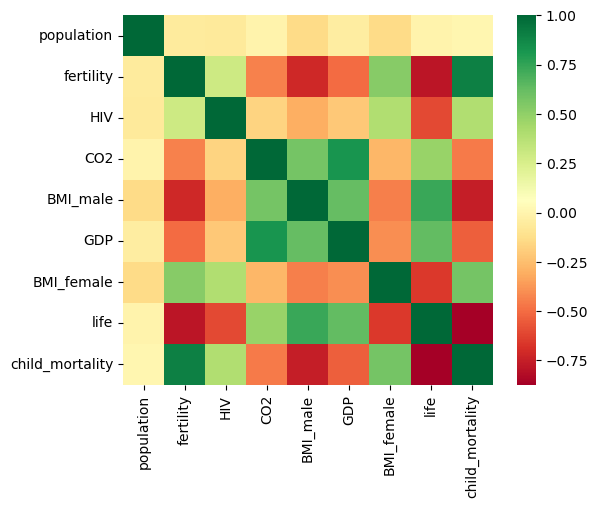

In [18]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151919


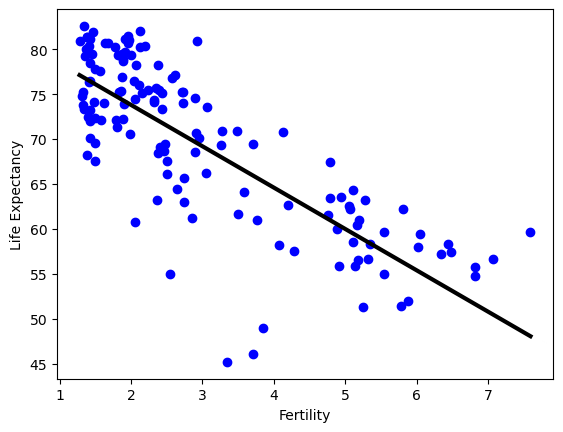

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size = 0.3, random_state=42)

reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [20]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793137


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

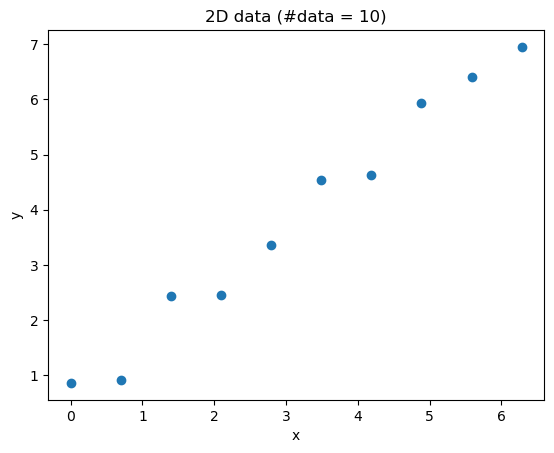

In [25]:
N = 10
m = .9
c = 1
x = np.linspace(0, 2*np.pi, N)
y = m*x + c + np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [26]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1, self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

In [27]:
dataset = MyDataset(x,y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.8587], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([0.9034], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.4383], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.4529], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.3510], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.5444], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.6324], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.9370], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.4060], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.9521], dtype=torch.float64)


In [28]:
from torch.utils.data import DataLoader

dataset = MyDataset(x,y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [29]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 4.8869],
        [1.0000, 2.7925],
        [1.0000, 5.5851],
        [1.0000, 4.1888]], dtype=torch.float64),
 'label': tensor([[5.9370],
        [3.3510],
        [6.4060],
        [4.6324]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 2.0944],
        [1.0000, 6.2832],
        [1.0000, 0.0000]], dtype=torch.float64),
 'label': tensor([[2.4383],
        [2.4529],
        [6.9521],
        [0.8587]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[0.9034],
        [4.5444]], dtype=torch.float64)}


In [30]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [31]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [32]:
cost = nn.MSELoss()

In [33]:
num_epochs = 10
l_rate = 0.01

optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'].float())
        error = cost(predictions, samples['label'].float())
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        optimiser.zero_grad()
        error.backward()
        optimiser.step()
        

Epoch = 0
	Batch = 0, Error = 19.5169620513916
	Batch = 1, Error = 5.866902828216553
	Batch = 2, Error = 3.9834275245666504
Epoch = 1
	Batch = 0, Error = 2.4211361408233643
	Batch = 1, Error = 0.8344032764434814
	Batch = 2, Error = 0.08277535438537598
Epoch = 2
	Batch = 0, Error = 0.301970511674881
	Batch = 1, Error = 0.20067128539085388
	Batch = 2, Error = 0.2720904052257538
Epoch = 3
	Batch = 0, Error = 0.024511151015758514
	Batch = 1, Error = 0.15388044714927673
	Batch = 2, Error = 0.1827217936515808
Epoch = 4
	Batch = 0, Error = 0.1518804430961609
	Batch = 1, Error = 0.06326422095298767
	Batch = 2, Error = 0.0742783173918724
Epoch = 5
	Batch = 0, Error = 0.14586202800273895
	Batch = 1, Error = 0.07669081538915634
	Batch = 2, Error = 0.02768084965646267
Epoch = 6
	Batch = 0, Error = 0.17898859083652496
	Batch = 1, Error = 0.055805061012506485
	Batch = 2, Error = 0.04306165874004364
Epoch = 7
	Batch = 0, Error = 0.032426271587610245
	Batch = 1, Error = 0.13180994987487793
	Batch = 2,

In [34]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


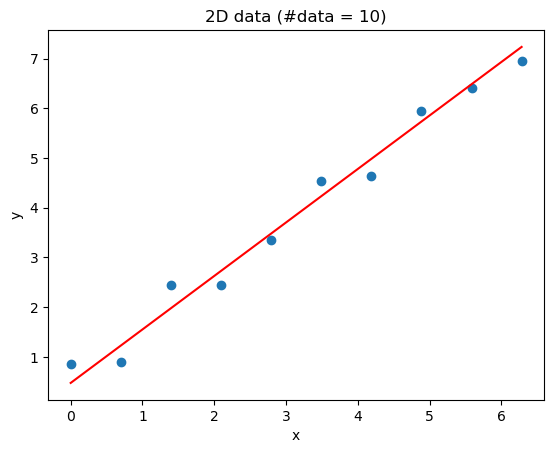

In [35]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

# III. Recommendation Systems 


In [36]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis = 1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:, j] - avg_ratings)) / sum(sim_users[i])
    return pred

In [37]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis = 0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred

In [38]:
def evaluateRS(M, M_result, algorithm, similarity):
    evaluateRS(M, M_result, 'user_cf', 'cosine')
    evaluateRS(M, M_result, 'user_cf', 'correlation')
    evaluateRS(M, M_result, 'item_cf', 'cosine')
    evaluateRS(M, M_result, 'item_cf', 'correlation')
pass

In [39]:
def evaluateRS(M, M_result, algorithm, similarity):
    evaluateRS(M, M_result, 'user_cf', 'cosine')
    evaluateRS(M, M_result, 'user_cf', 'correlation')
    evaluateRS(M, M_result, 'item_cf', 'cosine')
    evaluateRS(M, M_result, 'item_cf', 'correlation')
pass

In [40]:
def evaluate_rank(M, M_result, method, metric):
    results = []
    for method in ['user_cf', 'item_cf']:
        for metric in ['cosine', 'correlation']:
            rank_acc = evaluate_rank(M, M_result, method, metric)
            results += ["Rank accuracy of {0} with {1} metirc: {2}".format(method[1], metric, rank_acc)]

    print("\n".join(results))
pass

# IV. Exercises

# 1. Classification

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
from sklearn.model_selection import train_test_split
X = iris.data
Y =  iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, Y_test)

y_pred_prob = knn.predict_proba(X_test)
loss = log_loss(Y_test, y_pred_prob)
print("Test loss:", loss)

print("Test accuracy:", acc)

Test loss: 0.02703100720721139
Test accuracy: 1.0


8/8 [====================] - 1.0000 - k: 8
Test accuracy: 1.0000


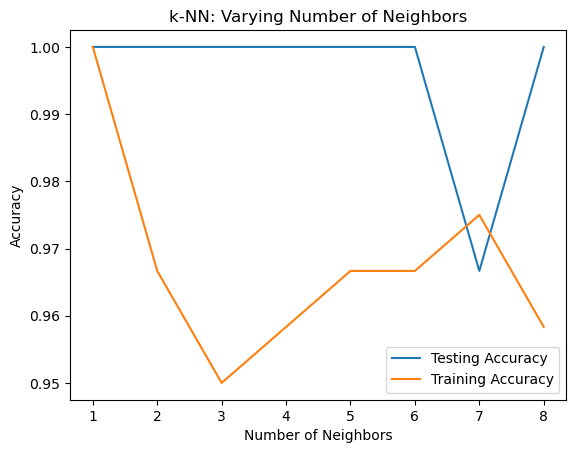

In [4]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

    print(f"{i+1}/{len(neighbors)} [{'='*int(test_accuracy[i]*20):<20}] - {test_accuracy[i]:.4f} - k: {k}")

print(f"Test accuracy: {test_accuracy[-1]:.4f}")

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [7]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode target variable
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 2.4756 - accuracy: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 2.1164 - accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.8518 - accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.6819 - accuracy: 0.3333
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.5468 - accuracy: 0.3750
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4550 - accuracy: 0.5583
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3715 - accuracy: 0.5667
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.4000
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2587 - accuracy: 0.3333
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2175 - accuracy: 0.3333
Epoch 11/50
12/12 [

1/1 [==============================] - 0s 38ms/step - loss: 0.6988 - accuracy: 0.8667
Test accuracy: 0.8666666746139526


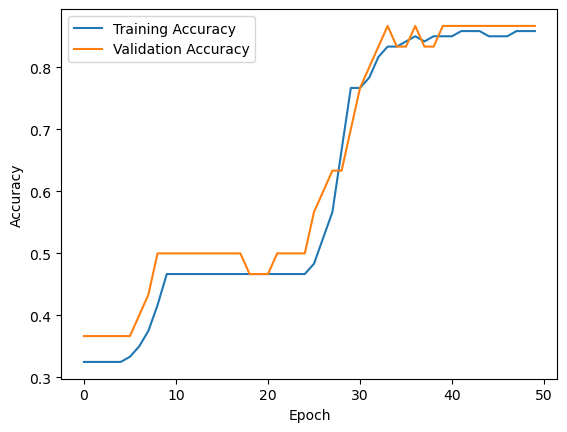

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network with one hidden layer of 10 nodes
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to match the input shape of a CNN
X_train = X_train.reshape(-1, 4, 1, 1)
X_test = X_test.reshape(-1, 4, 1, 1)


In [13]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 1), activation='relu', input_shape=(4, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
4/4 [==============================] - 1s 58ms/step - loss: 1.0853 - accuracy: 0.3833 - val_loss: 1.0391 - val_accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0452 - accuracy: 0.5250 - val_loss: 1.0162 - val_accuracy: 0.5667
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 1.0179 - accuracy: 0.5167 - val_loss: 0.9992 - val_accuracy: 0.5333
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9947 - accuracy: 0.4917 - val_loss: 0.9823 - val_accuracy: 0.5333
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9754 - accuracy: 0.5000 - val_loss: 0.9646 - val_accuracy: 0.5667
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.9605 - accuracy: 0.5167 - val_loss: 0.9507 - val_accuracy: 0.6000
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 0.9451 - accuracy: 0.5417 - val_loss: 0.9343 - val_accuracy: 0.6000
Epoch 8/50
4/4 [===========

1/1 [==============================] - 0s 25ms/step - loss: 0.6009 - accuracy: 0.8000
Test loss: 0.6009406447410583
Test accuracy: 0.800000011920929


<Figure size 640x480 with 0 Axes>

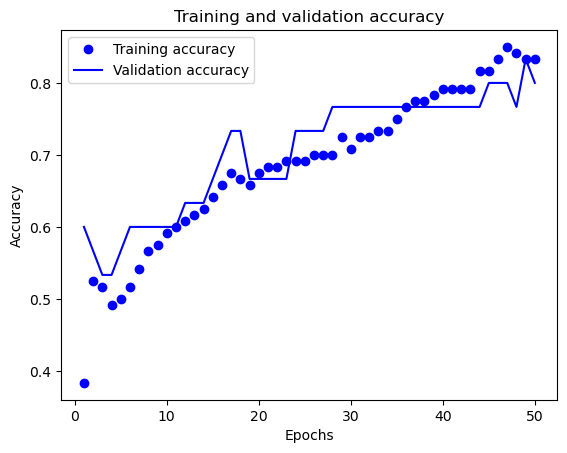

<Figure size 640x480 with 0 Axes>

In [14]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Visualize the training and validation accuracy and loss over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


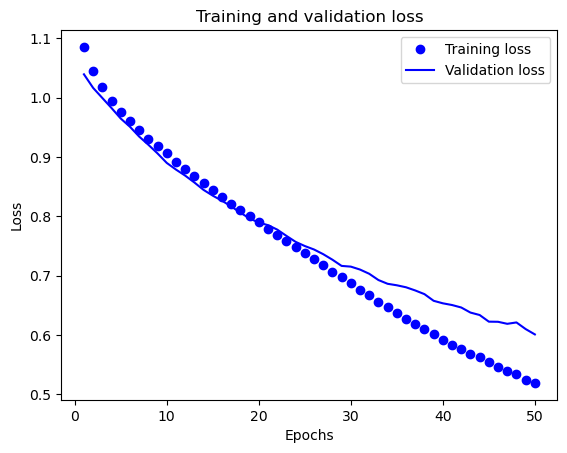

In [15]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 2. Recommendation Systems 

In [14]:
import chardet
with open('movies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [22]:
import pandas as pd
movies = pd.read_csv('movies.csv',encoding='ISO-8859-1')
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users.csv')
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
print(list(movies.genres))

["Animation|Children's|Comedy", "Adventure|Children's|Fantasy", 'Comedy|Romance', 'Comedy|Drama', 'Comedy', 'Action|Crime|Thriller', 'Comedy|Romance', "Adventure|Children's", 'Action', 'Action|Adventure|Thriller', nan, 'Comedy|Horror', "Animation|Children's", 'Drama', 'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance', 'Thriller', 'Comedy', 'Action', 'Action|Comedy|Drama', 'Crime|Drama|Thriller', 'Thriller', 'Drama|Sci-Fi', 'Drama|Romance', 'Drama', 'Drama', 'Romance', nan, 'Drama', 'Drama', 'Drama|Sci-Fi', 'Adventure|Romance', "Children's|Comedy|Drama", 'Drama|Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy|Romance', nan, 'Drama|War', 'Action|Crime|Drama', 'Drama', 'Action|Adventure', 'Comedy|Drama', 'Drama|Romance', 'Crime|Thriller', "Animation|Children's|Musical|Romance", 'Drama|Romance', nan, 'Action|Drama|Thriller', 'Comedy', 'Drama', nan, 'Drama', "Adventure|Children's|Fantasy", 'Drama', nan, nan, nan, 'Drama|Thriller', 'Drama', 'Comedy', 'Comedy|Romance', 'Comedy'

In [24]:
# Convert float values in the 'genres' column to empty strings
movies['genres'] = movies['genres'].apply(lambda x: '' if isinstance(x, float) else x)

# Split the genre strings into lists of genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

# Create a MultiLabelBinarizer object to binarize the genres
mlb = MultiLabelBinarizer()

# Binarize the genres for each movie and create a new dataframe with the binary vectors
genres = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_, index=movies.index)

# Select the subset of the binary vectors corresponding to the genres
Ij = genres.values

# Print the first four rows of Ij
print(Ij[:4])


[[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]]


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv',encoding='ISO-8859-1')

# Assume we have a list of dictionaries called 'ratings' where each dictionary
# represents a user's ratings for different movies
ratings_list = []
for _, row in ratings.iterrows():
    rating_dict = {'userId': row['user_id'], 'movieId': row['movie_id'], 'rating': row['rating']}
    ratings_list.append(rating_dict)

# Convert the list of dictionaries to a numpy array
ratings_matrix = np.array([list(r.values()) for r in ratings_list])

# Compute cosine similarity between all pairs of rows in the matrix
user_similarity = cosine_similarity(ratings_matrix)

# Assume we have a matrix called 'movies_matrix' where each row represents a movie
# and each column represents a feature of that movie (e.g. genre, director, etc.)

# Convert movie genres to numerical values
genres = set()
for genre_string in movies['genres'].values:
    if not isinstance(genre_string, str):  # check if the value is not a string
        continue
    genres.update(genre_string.split('|'))

genre_dict = {genre: i for i, genre in enumerate(sorted(genres))}
movies_matrix = np.zeros((movies.shape[0], len(genres)))
for i, genre_string in enumerate(movies['genres'].values):
    if not isinstance(genre_string, str):  # check if the value is not a string
        continue
    for genre in genre_string.split('|'):
        movies_matrix[i, genre_dict[genre]] = 1

# Compute cosine similarity between all pairs of rows in the matrix
movie_similarity = cosine_similarity(movies_matrix)


In [29]:
print(movie_similarity)

[[1.         0.33333333 0.40824829 ... 0.         0.         0.        ]
 [0.33333333 1.         0.         ... 0.         0.         0.        ]
 [0.40824829 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.5       ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.5        0.         1.        ]]


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
ratings = pd.read_csv('ratings.csv')


# Split the dataset into training and testing sets
train_ratings, test_ratings = train_test_split(ratings, test_size=0.5, random_state=42)

# Calculate ratings using the training dataset
ratings = train_ratings.groupby(['user_id', 'movie_id'])['rating'].mean().reset_index()

# Print the ratings for the first 10 users and products
print(ratings.head(10))


   user_id  movie_id  rating
0        1         3     5.0
1        1         4     4.0
2        1         5     3.0
3        1         6     3.0
4        1         7     3.0
5        1         9     3.0
6        1        10     2.0
7        1        12     4.0
8        1        13     1.0
9        1        15     5.0


In [31]:
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')

# Split the data into training and testing datasets
train_data = ratings.sample(frac=0.8, random_state=42)
test_data = ratings.drop(train_data.index)

# Create matrix for training dataset
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

# Create matrix for testing dataset
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

# Print the shape of the matrices
print('Training dataset matrix shape:', train_data_matrix.shape)
print('Testing dataset matrix shape:', test_data_matrix.shape)


Training dataset matrix shape: (100, 100)
Testing dataset matrix shape: (100, 100)
